In [17]:
from numpy import *  
import pandas as pd
import time  
import matplotlib.pyplot as plt  
  

In [28]:
  
# calculate Euclidean distance  
def euclDistance(vector1, vector2):  
    return sqrt(sum(power(vector2 - vector1, 2)))  
  
# init centroids with random samples  
def initCentroids(dataSet, k):  
    numSamples, dim = dataSet.shape  
    centroids = zeros((k, dim))  
    for i in range(k):  
        index = int(random.uniform(0, numSamples))  
        centroids[i, :] = dataSet[index, :]  
    return centroids  
  
# k-means cluster  
def kmeans(dataSet, k):  
    numSamples = dataSet.shape[0]  
    # first column stores which cluster this sample belongs to,  
    # second column stores the error between this sample and its centroid  
    clusterAssment = mat(zeros((numSamples, 2)))  
    clusterChanged = True  
  
    ## step 1: init centroids  
    centroids = initCentroids(dataSet, k)  
  
    while clusterChanged:  
        clusterChanged = False  
        ## for each sample  
        for i in xrange(numSamples):  
            minDist  = 100000.0  
            minIndex = 0  
            ## for each centroid  
            ## step 2: find the centroid who is closest  
            for j in range(k):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])  
                if distance < minDist:  
                    minDist  = distance  
                    minIndex = j  
              
            ## step 3: update its cluster  
            if clusterAssment[i, 0] != minIndex:  
                clusterChanged = True  
                clusterAssment[i, :] = minIndex, minDist**2  
  
        ## step 4: update centroids  
        for j in range(k):  
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]]  
            centroids[j, :] = mean(pointsInCluster, axis = 0)  
  
    print 'Congratulations, cluster complete!'  
    return centroids, clusterAssment  
  
# show your cluster only available with 2-D data  
def showCluster(dataSet, k, centroids, clusterAssment):  
    numSamples, dim = dataSet.shape  
    if dim != 2:  
        print "Sorry! I can not draw because the dimension of your data is not 2!"  
        return 1  
  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print "Sorry! Your k is too large! please contact Zouxy"  
        return 1  
  
    # draw all samples  
    for i in xrange(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex],markersize = 5)  
  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # draw the centroids  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
  
    plt.show()  

step 1: load data...


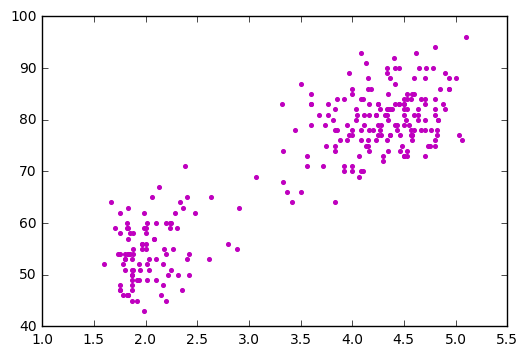

In [31]:
## step 1: load data  
print "step 1: load data..."  
# dataSet = []  
# fileIn = open('faithful.txt')  
# for line in fileIn.readlines():  
#     lineArr = line.strip().split(' ')  
#     dataSet.append([float(lineArr[0]), float(lineArr[1])]) 
dataSet = pd.read_csv("faithful.txt",sep=' ',header=None)
dataSet.shape
x,y = dataSet[0],dataSet[1]
plt.scatter(x,y, color = 'm', label='1', s = 7)  
plt.show()
# x,y = dataSet(:,0,dataSet(:,1)
# plt.scatter(x,y, color = 'm', label='1', s = 1)  
# plt.show()

step 2: clustering...
Congratulations, cluster complete!
step 3: show the result...


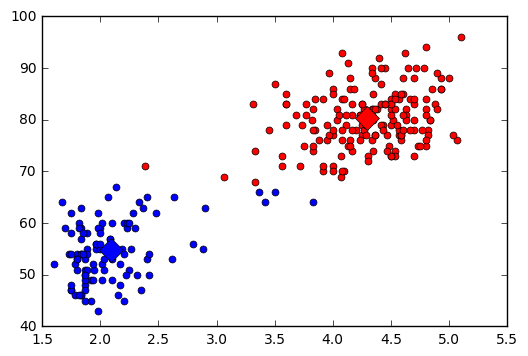

In [29]:
## step 2: clustering...  
print "step 2: clustering..."  
dataSet = mat(dataSet)  
k = 2  
centroids, clusterAssment = kmeans(dataSet, k)  
  
## step 3: show the result  
print "step 3: show the result..."  
showCluster(dataSet, k, centroids, clusterAssment)  